In [1]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Data Understanding

In [2]:
df = pd.read_csv("data/train.csv")
df.head()

<ipython-input-2-09a0db6cb830>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
df.isnull().sum()

,0
ID,0
Customer_ID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.describe(include="all")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,84998.000000,100000.000000,...,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,NaN,NaN,...,4,13178,NaN,404,3,NaN,91049,7,98792,3
top,0x25fb6,CUS_0x942c,January,Langep,38,#F%$D@*&8,_______,20867.67,NaN,NaN,...,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,NaN,NaN,...,36479,24,NaN,446,52326,NaN,4305,25513,9,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.170850,17.091280,...,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.686167,117.404834,...,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,...,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.568229,3.000000,...,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,...,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,...,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,NaN,NaN


In [6]:
def return_null(val):
    if isinstance(val, str) and "__" in val:
        return np.nan
    elif isinstance(val, str) and "_" in val:
        return np.nan
    else:
        return val

In [7]:
new_df = df.copy()
invalid_numerical_columns = [
    'Age',
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in invalid_numerical_columns:
    new_df[col] = new_df[col].apply(return_null)
    new_df[col] = new_df[col].astype("float")

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       95061 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   float64
 13  Type_of_Loan              88592 non-null   ob

In [8]:
def call_history_age(val):
    try:
        year, month = 0, 0
        if re.search("year", val, re.IGNORECASE):
            year - int(re.findall("\d+", val)[0])
        if re.search("month", val, re.IGNORECASE):
            month = int(re.findall("\d+", val)[1])
        return year*12 + month
    except:
        return np.nan

In [9]:
new_df["Credit_History_Age"] = new_df["Credit_History_Age"].apply(call_history_age)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       95061 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   float64
 13  Type_of_Loan              88592 non-null   ob

In [10]:
new_df.drop(["ID", "Name", "SSN", "Annual_Income"], axis=1, inplace=True)

In [11]:
numerical_columns = [
    'Age',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Credit_History_Age'
]

new_df[numerical_columns].describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age
count,95061.000000,84998.000000,100000.000000,100000.00000,100000.000000,95215.000000,100000.000000,90254.000000,97909.000000,98035.000000,98991.000000,100000.000000,100000.000000,91216.000000,98791.000000,90970.000000
mean,110.934505,4194.170850,17.091280,22.47443,72.466040,2.780339,21.068780,31.033051,10.389025,27.754251,1426.503700,32.285173,1403.118217,195.539456,402.551258,5.597208
std,689.407864,3183.686167,117.404834,129.05741,466.422621,62.500940,14.860104,226.955758,6.789496,193.177339,1155.045753,5.116875,8306.041270,199.564527,213.925499,3.449988
min,-500.000000,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760,0.000000
25%,24.000000,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.080000,28.052567,30.306660,72.236692,270.106630,3.000000
50%,33.000000,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.370000,32.305784,69.249473,128.954538,336.731225,5.000000
75%,42.000000,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1948.200000,36.496663,161.224249,236.815814,470.262938,9.000000
max,8698.000000,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519,11.000000


In [12]:
def check_invalid_values(df, invalid_value, column):
    df = df.copy()
    customer_id = df[(df[column] == invalid_value)].groupby(by="Customer_ID", as_index=False)["Num_Bank_Accounts"].mean()
    print(df[df.Customer_ID.isin(customer_id.Customer_ID)])

check_invalid_values(new_df, -500, "Age")

      Customer_ID     Month    Age Occupation  Monthly_Inhand_Salary  \
0       CUS_0xd40   January   23.0  Scientist            1824.843333   
1       CUS_0xd40  February   23.0  Scientist                    NaN   
2       CUS_0xd40     March -500.0  Scientist                    NaN   
3       CUS_0xd40     April   23.0  Scientist                    NaN   
4       CUS_0xd40       May   23.0  Scientist            1824.843333   
...           ...       ...    ...        ...                    ...   
99963  CUS_0x372c     April -500.0     Lawyer                    NaN   
99964  CUS_0x372c       May   18.0     Lawyer            3468.315833   
99965  CUS_0x372c      June   19.0     Lawyer            3468.315833   
99966  CUS_0x372c      July   19.0     Lawyer            3468.315833   
99967  CUS_0x372c    August   19.0     Lawyer            3468.315833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                      3                4              3      

In [13]:
new_df["Age"] = new_df.Age.apply(lambda x: np.nan if x<0 or x>90 else x)
new_df["Num_Bank_Accounts"] = new_df.Num_Bank_Accounts.apply(lambda x: np.nan if x<0 or x>15 else x)
new_df["Num_Credit_Card"] = new_df.Num_Credit_Card.apply(lambda x: np.nan if x<0 or x>15 else x)
new_df["Interest_Rate"] = new_df.Interest_Rate.apply(lambda x: np.nan if x>50 else x)
new_df["Num_of_Loan"] = new_df.Num_of_Loan.apply(lambda x: np.nan if x<0 or x>10 else x)
new_df["Delay_from_due_date"] = new_df.Delay_from_due_date.apply(lambda x: 0.0 if x<0 else x)
new_df["Num_of_Delayed_Payment"] = new_df.Num_of_Delayed_Payment.apply(lambda x: np.nan if x<0 or x>30 else x)
new_df["Changed_Credit_Limit"] = new_df.Changed_Credit_Limit.apply(lambda x: 0.0 if x<0 else x)
new_df["Num_Credit_Inquiries"] = new_df.Num_Credit_Inquiries.apply(lambda x: np.nan if x>25 else x)
new_df["Total_EMI_per_month"] = new_df.Total_EMI_per_month.apply(lambda x: np.nan if x>1400 else x)

new_df[numerical_columns].describe(include="all")

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age
count,92365.000000,84998.000000,98664.000000,97732.000000,97966.000000,90892.000000,100000.000000,88915.000000,97909.000000,96385.000000,98991.000000,100000.000000,96781.000000,91216.000000,98791.000000,90970.000000
mean,33.314145,4194.170850,5.368980,5.533612,14.531603,3.534172,21.081910,13.424529,10.427352,5.781117,1426.503700,32.285173,106.036989,195.539456,402.551258,5.597208
std,10.770143,3183.686167,2.592451,2.068336,8.739748,2.447488,14.840204,6.207212,6.720510,3.860712,1155.045753,5.116875,122.739064,199.564527,213.925499,3.449988
min,14.000000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760,0.000000
25%,24.000000,1625.568229,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.080000,28.052567,29.270265,72.236692,270.106630,3.000000
50%,33.000000,3093.745000,5.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.370000,32.305784,66.413778,128.954538,336.731225,5.000000
75%,42.000000,5957.448333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.870000,8.000000,1948.200000,36.496663,146.701253,236.815814,470.262938,9.000000
max,56.000000,15204.633333,11.000000,15.000000,34.000000,9.000000,67.000000,28.000000,36.970000,17.000000,4998.070000,50.000000,1396.000000,1977.326102,1602.040519,11.000000


In [14]:
new_df[numerical_columns].isnull().sum()

,0
Age,7635
Monthly_Inhand_Salary,15002
Num_Bank_Accounts,1336
Num_Credit_Card,2268
Interest_Rate,2034
Num_of_Loan,9108
Delay_from_due_date,0
Num_of_Delayed_Payment,11085
Changed_Credit_Limit,2091
Num_Credit_Inquiries,3615


In [15]:
def fill_numerical_missing_value(column, how, df):
    df = df.copy()

    missing_customer_id = df[df[column].isna()].Customer_ID
    new = df[df.Customer_ID.isin(missing_customer_id)].groupby(by="Customer_ID", as_index=False).agg({
        column: how
    })

    for index, row in df[df[column].isna()].iterrows():
        df[column].iloc[index] = new[new.Customer_ID == str(row["Customer_ID"])][column]

    return df[column]

missing_numerical_columns = [
    'Age',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Total_EMI_per_month',
    'Amount_invested_monthly'
]

for col in missing_numerical_columns:
    new_df[col] = fill_numerical_missing_value(
        column=col,
        how="median",
        df=new_df
    )

Streaming output truncated to the last 5000 lines.

  df[column].iloc[index] = new[new.Customer_ID == str(row["Customer_ID"])][column]
<ipython-input-15-738ea4923a73>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].iloc[index] = new[new.Customer_ID == str(row["Customer_ID"])][column]
<ipython-input-15-738ea4923a73>:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, 

In [16]:
new_df['Monthly_Balance'] = new_df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda v: v.ffill())
new_df['Monthly_Balance'] = new_df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda v: v.bfill())
new_df['Monthly_Balance'] = new_df['Monthly_Balance'].astype('float')

new_df['Credit_History_Age'] = new_df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.ffill())
new_df['Credit_History_Age'] = new_df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.bfill())
new_df['Credit_History_Age'] = new_df['Credit_History_Age'].astype('float')

In [17]:
new_df[numerical_columns].isnull().sum()

,0
Age,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0
Num_Credit_Inquiries,0


In [18]:
new_df[numerical_columns].describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.31111,4198.490149,5.368840,5.533910,14.53208,3.532880,21.081910,13.332490,10.426638,5.779590,1426.220376,32.285173,106.019121,193.686347,403.067273,5.591020
std,10.76504,3187.491752,2.593273,2.067712,8.74133,2.446356,14.840204,6.265679,6.715825,3.861453,1155.129026,5.116875,122.790313,194.785222,214.796261,3.449483
min,14.00000,303.645417,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760,0.000000
25%,24.00000,1626.761667,3.000000,4.000000,7.00000,2.000000,10.000000,9.000000,5.340000,3.000000,566.072500,28.052567,29.179343,73.730625,270.034729,3.000000
50%,33.00000,3095.978333,5.000000,5.000000,13.00000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.155000,32.305784,66.403026,129.361839,337.088846,5.000000
75%,42.00000,5961.637500,7.000000,7.000000,20.00000,5.000000,28.000000,18.000000,14.850000,8.000000,1945.962500,36.496663,146.707645,234.346249,471.553318,9.000000
max,56.00000,15204.633333,11.000000,15.000000,34.00000,9.000000,67.000000,28.000000,36.970000,17.000000,4998.070000,50.000000,1396.000000,1977.326102,1602.040519,11.000000


In [19]:
categorical_columns = [
    'Month',
    'Occupation',
    'Type_of_Loan',
    'Credit_Mix',
    'Payment_of_Min_Amount',
    'Payment_Behaviour',
    'Credit_Score'
]

for col in categorical_columns:
    print(new_df[col].value_counts())

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64
Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt 

In [20]:
new_df['Occupation'] = new_df['Occupation'].apply(lambda x: np.NaN if x == "_______" else x)
new_df['Credit_Mix'] = new_df['Credit_Mix'].str.replace('_','Unknown')
new_df['Payment_Behaviour'] = new_df['Payment_Behaviour'].str.replace('!@9#%8','Unknown')

new_df['Type_of_Loan'] = new_df[~(new_df.Type_of_Loan.isna())]['Type_of_Loan'].apply(lambda x: str(x).split(',')[0])

In [21]:
for col in categorical_columns:
    print(new_df[col].value_counts())

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64
Type_of_Loan
Credit-Builder Loan        10416
Payday Loan                10248
Personal Loan              10200
Not Specified               9848
Student Loan                9672
Debt Consolidation Loan     9648
Mortgage Loan               9632
Auto Loan                   9568
Home Equity Loan            9360
Name: count, dtype: int64
Credit_Mix
Standard    36479
Good        24337
Unknown     20195
Bad         18989
Name: count, dtype: int64
Payment_of_M

In [22]:
new_df[categorical_columns].isna().sum()

,0
Month,0
Occupation,7062
Type_of_Loan,11408
Credit_Mix,0
Payment_of_Min_Amount,0
Payment_Behaviour,0
Credit_Score,0


In [23]:
new_df['Occupation'] = new_df.groupby('Customer_ID')['Occupation'].transform(lambda v: v.ffill())
new_df['Occupation'] = new_df.groupby('Customer_ID')['Occupation'].transform(lambda v: v.bfill())

new_df["Type_of_Loan"].fillna(value="Not Specified", inplace=True)

<ipython-input-23-c0067f372eb2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df["Type_of_Loan"].fillna(value="Not Specified", inplace=True)


In [24]:
cleaned_df = new_df.copy()
cleaned_df.describe(include="all")

,Customer_ID,Month,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000.00000,100000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000,...,100000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000,100000.000000,100000
unique,12500,8,NaN,15,NaN,NaN,NaN,NaN,NaN,9,...,4,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,CUS_0x942c,January,NaN,Lawyer,NaN,NaN,NaN,NaN,NaN,Not Specified,...,Standard,NaN,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,8,12500,NaN,7096,NaN,NaN,NaN,NaN,NaN,21256,...,36479,NaN,NaN,NaN,52326,NaN,NaN,25513,NaN,53174
mean,NaN,NaN,33.31111,NaN,4198.490149,5.368840,5.533910,14.53208,3.532880,NaN,...,NaN,1426.220376,32.285173,5.591020,NaN,106.019121,193.686347,NaN,403.067273,NaN
std,NaN,NaN,10.76504,NaN,3187.491752,2.593273,2.067712,8.74133,2.446356,NaN,...,NaN,1155.129026,5.116875,3.449483,NaN,122.790313,194.785222,NaN,214.796261,NaN
min,NaN,NaN,14.00000,NaN,303.645417,0.000000,0.000000,1.00000,0.000000,NaN,...,NaN,0.230000,20.000000,0.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,NaN,24.00000,NaN,1626.761667,3.000000,4.000000,7.00000,2.000000,NaN,...,NaN,566.072500,28.052567,3.000000,NaN,29.179343,73.730625,NaN,270.034729,NaN
50%,NaN,NaN,33.00000,NaN,3095.978333,5.000000,5.000000,13.00000,3.000000,NaN,...,NaN,1166.155000,32.305784,5.000000,NaN,66.403026,129.361839,NaN,337.088846,NaN
75%,NaN,NaN,42.00000,NaN,5961.637500,7.000000,7.000000,20.00000,5.000000,NaN,...,NaN,1945.962500,36.496663,9.000000,NaN,146.707645,234.346249,NaN,471.553318,NaN


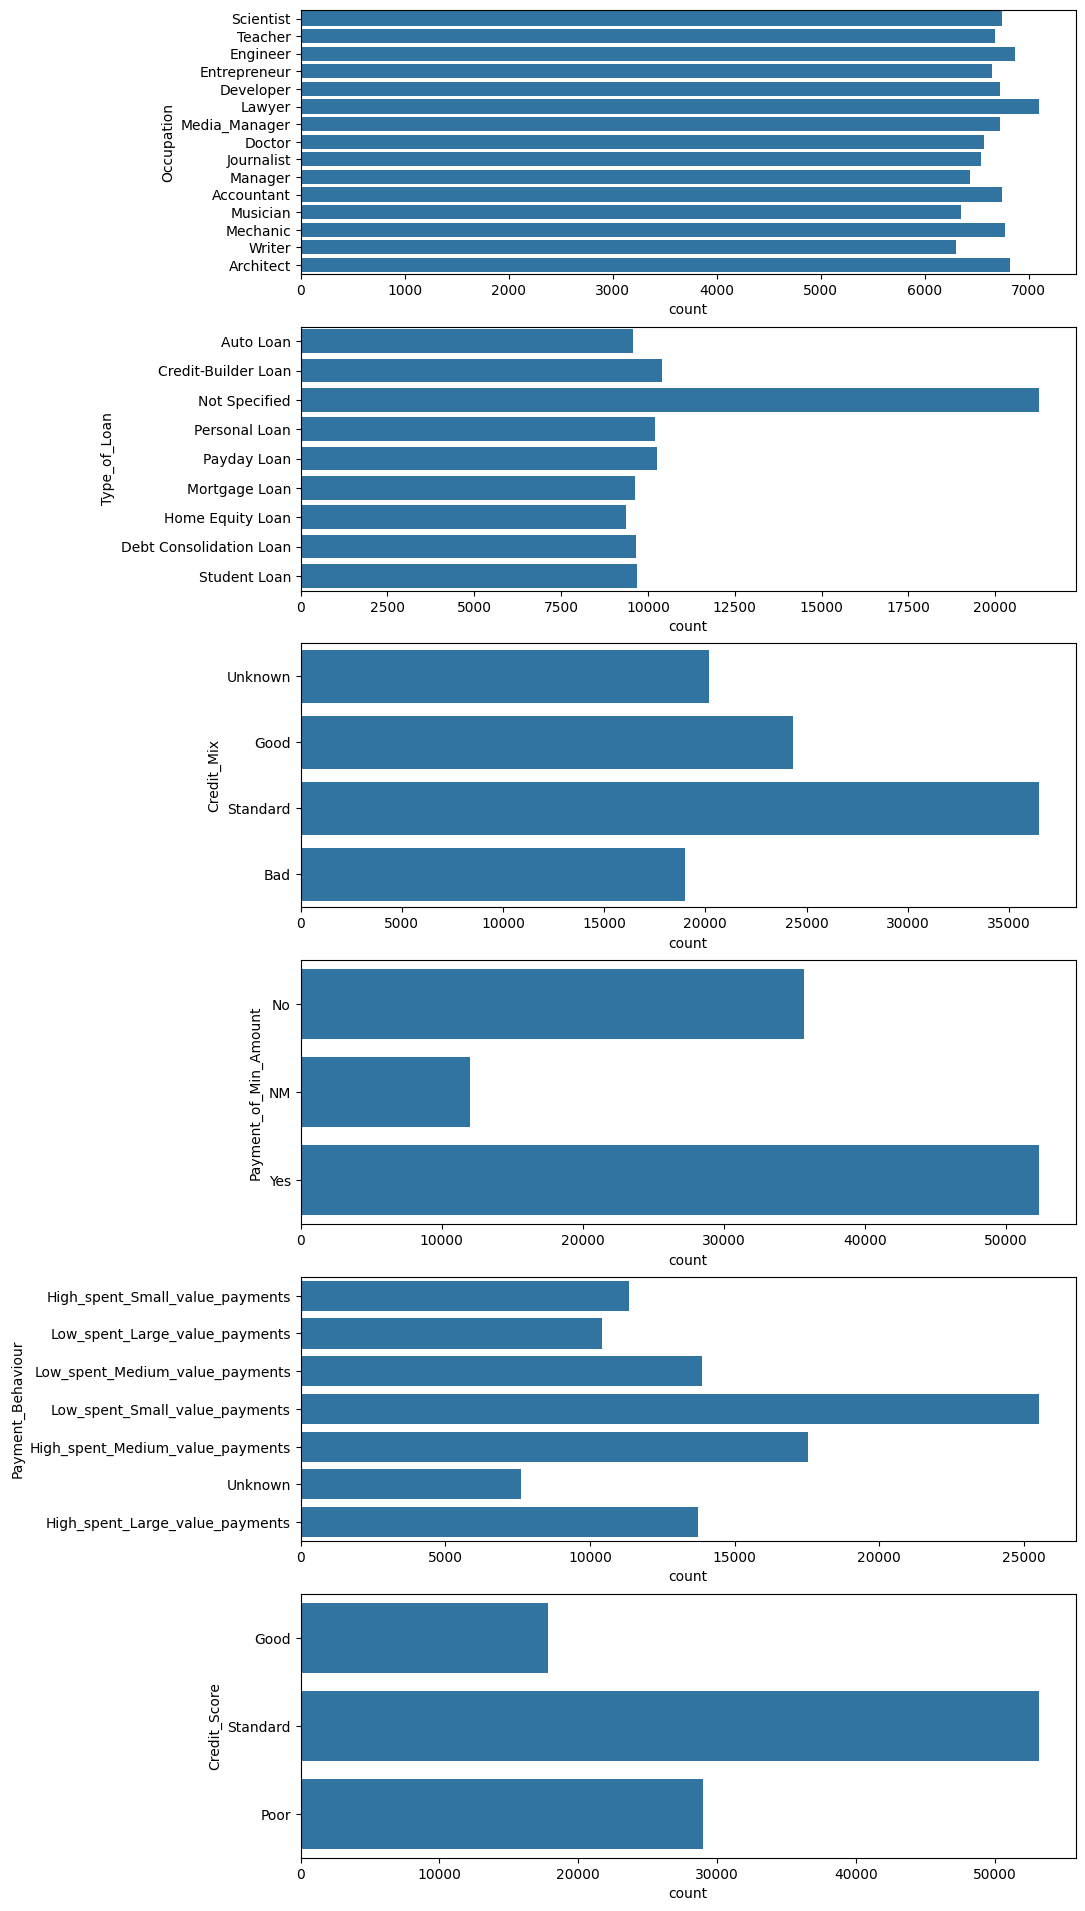

In [25]:
categorical_columns = [
    'Occupation',
    'Type_of_Loan',
    'Credit_Mix',
    'Payment_of_Min_Amount',
    'Payment_Behaviour',
    'Credit_Score'
]

fig, ax = plt.subplots(len(categorical_columns), 1,figsize=(10,24))
for i, feature in enumerate(categorical_columns):
    sns.countplot(data=cleaned_df, y=feature, ax=ax[i])
plt.show()

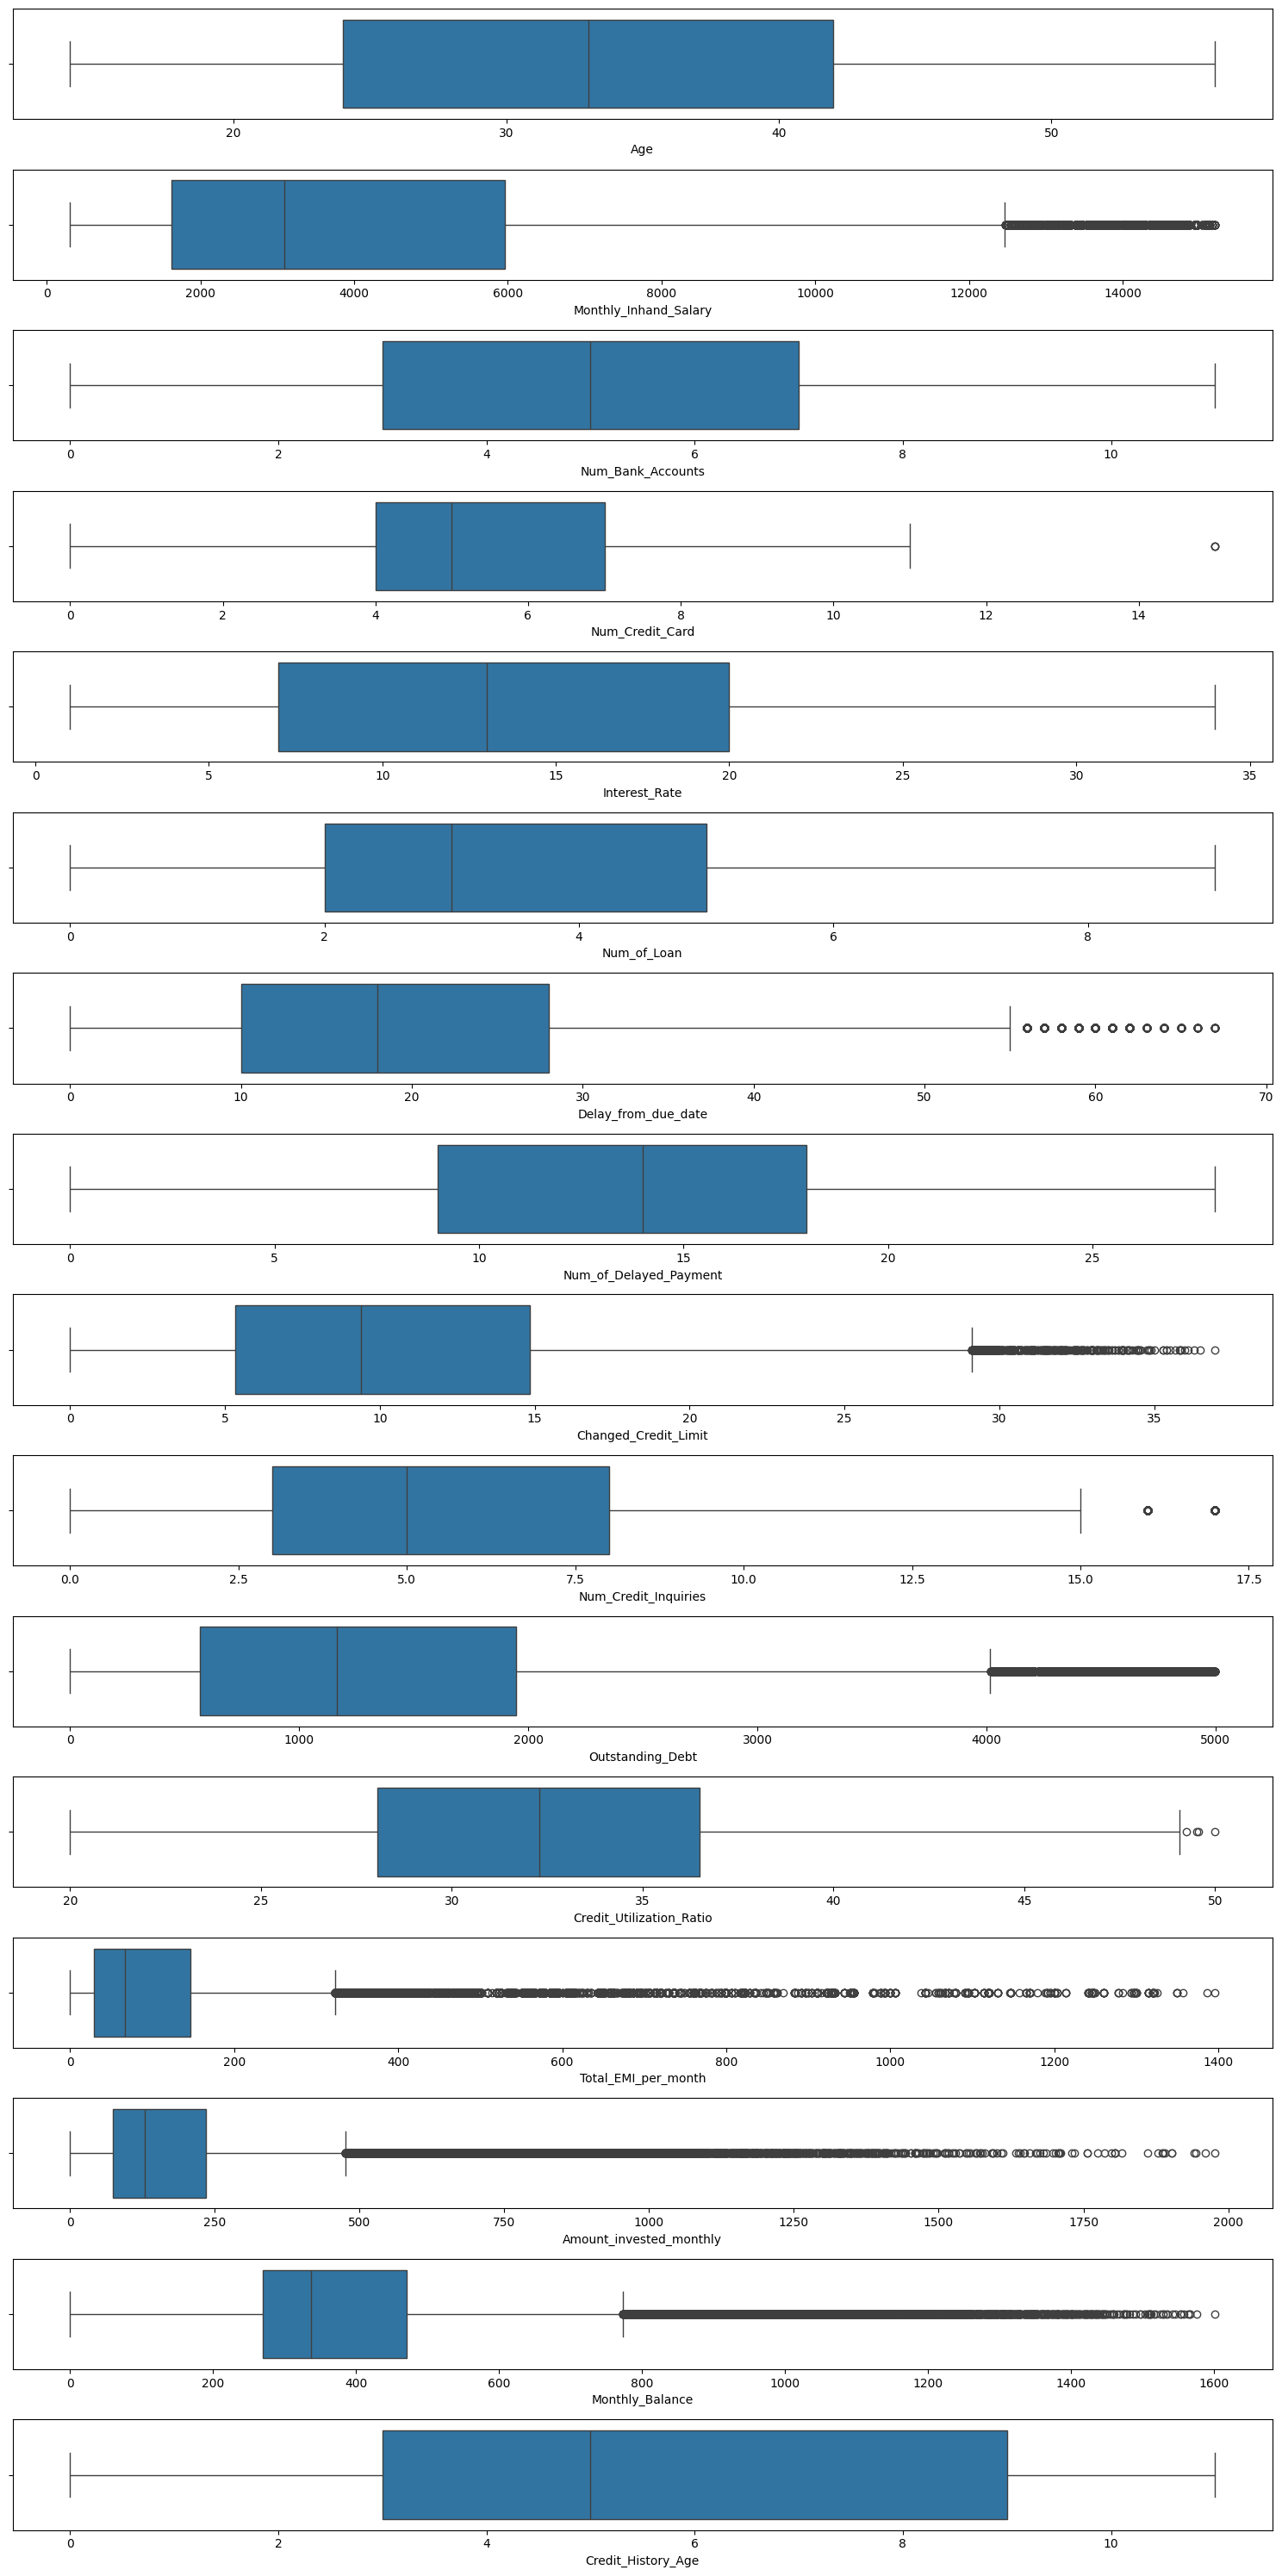

In [26]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,30))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers)
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

numerical_dis_plot(
    features=numerical_columns,
    df=cleaned_df
)

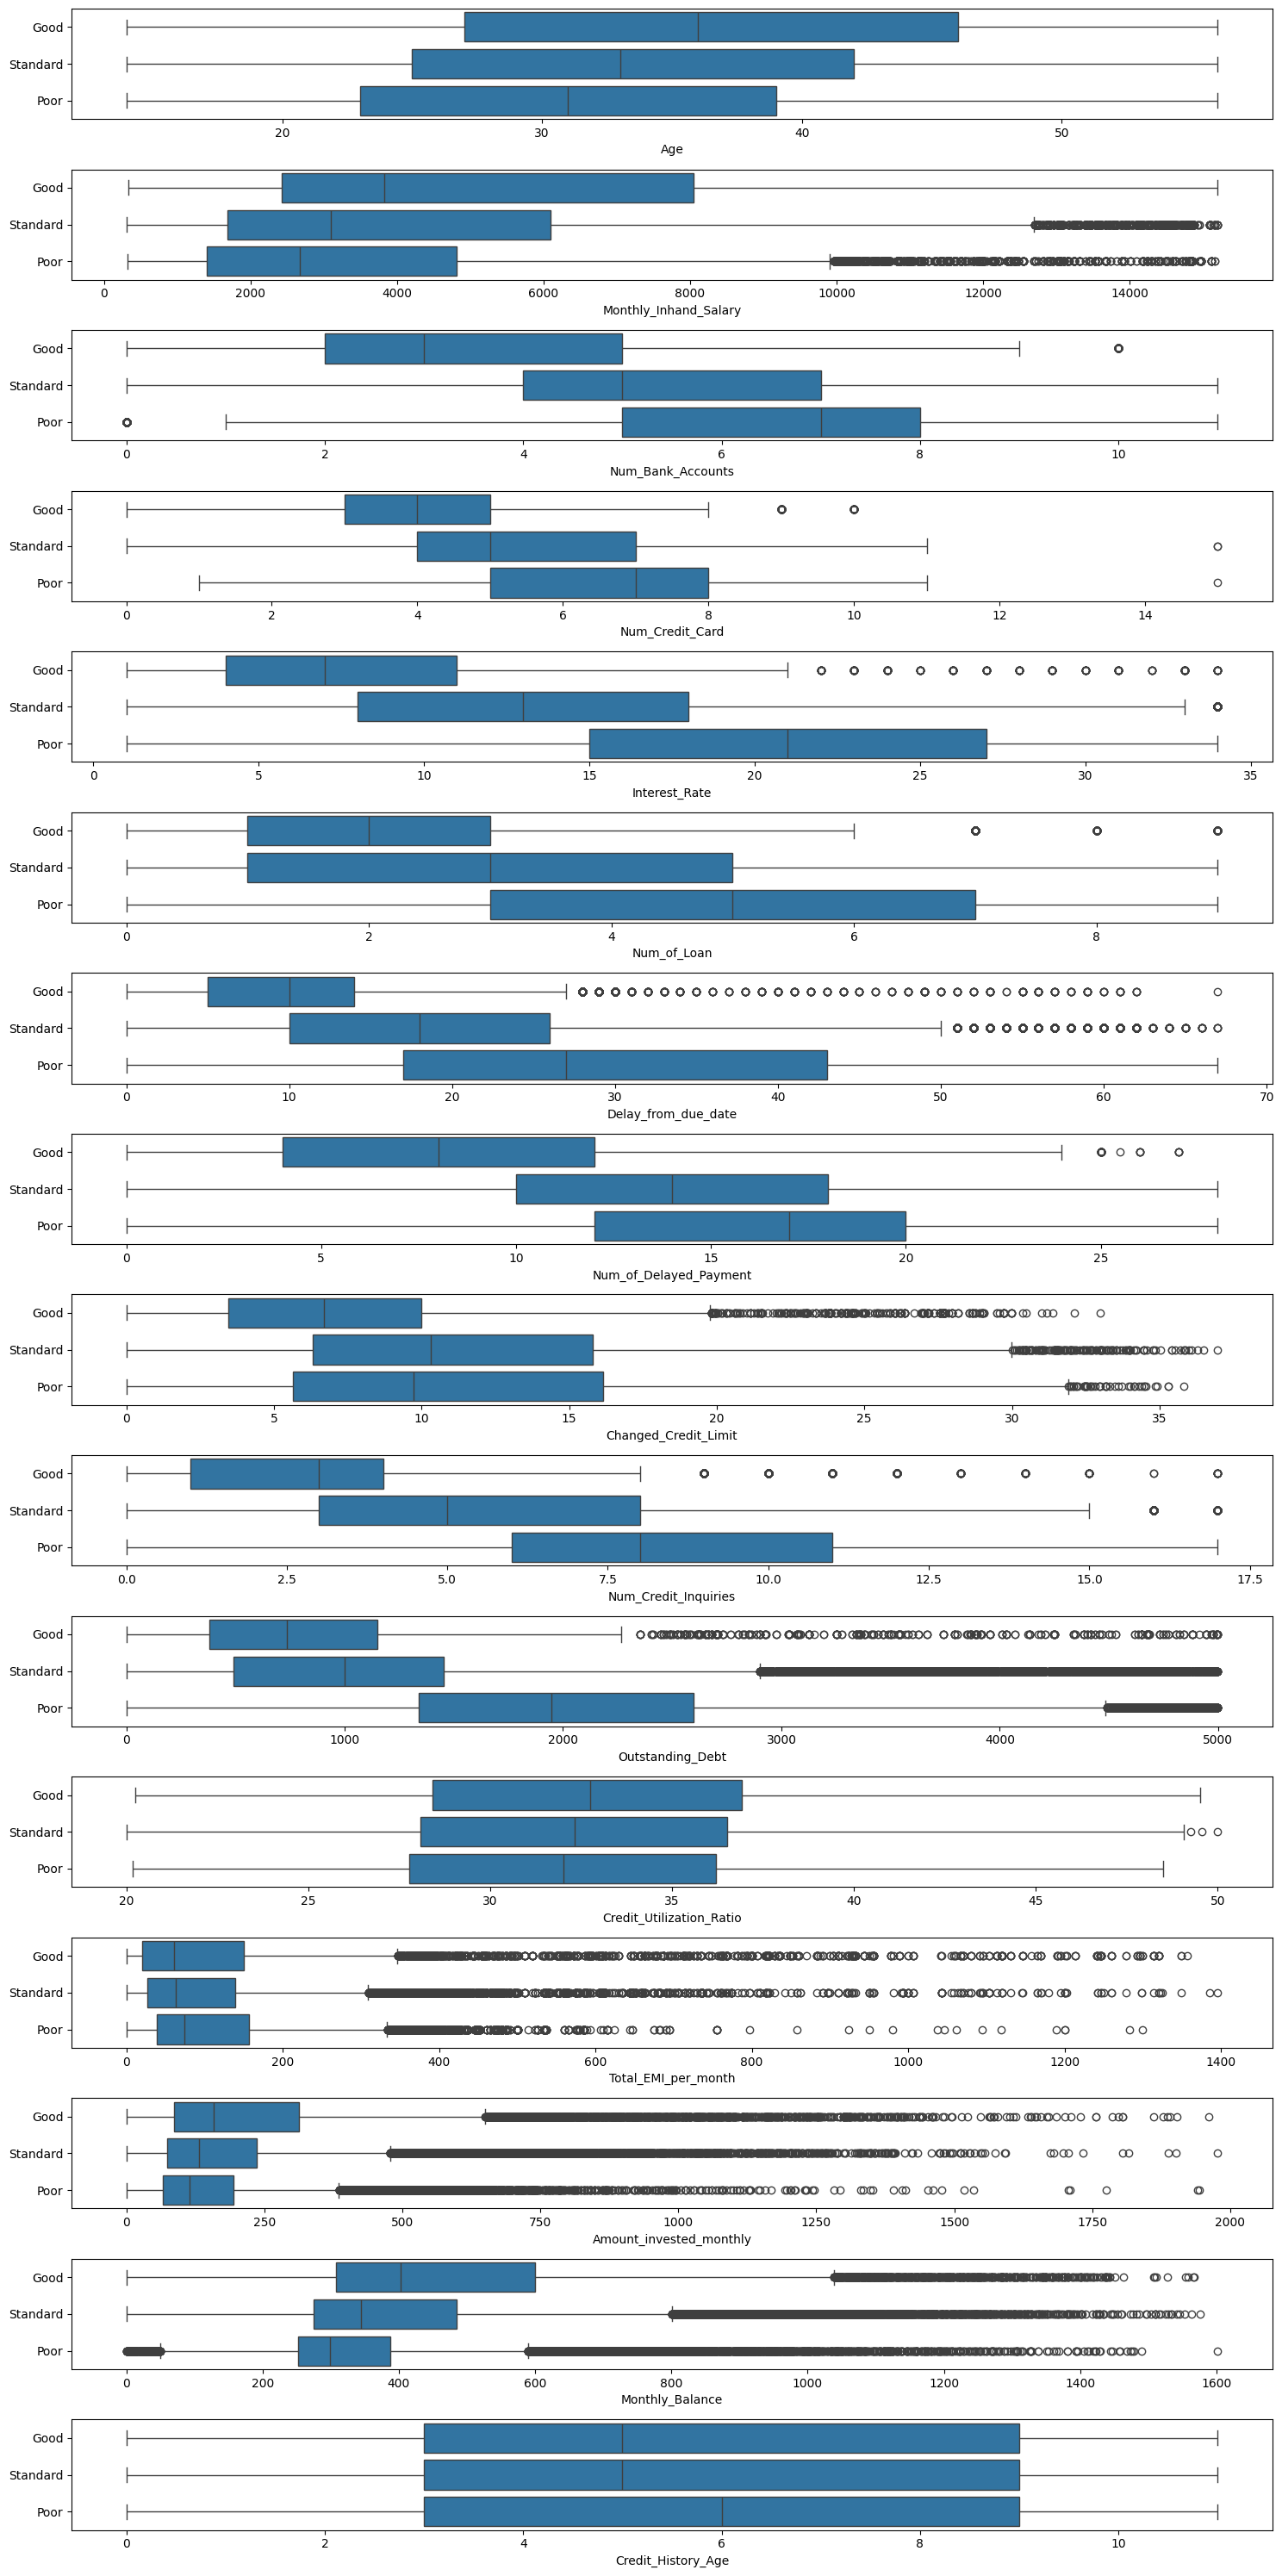

In [27]:
numerical_dis_plot(
    features=numerical_columns,
    df=cleaned_df,
    segment_feature="Credit_Score"
)

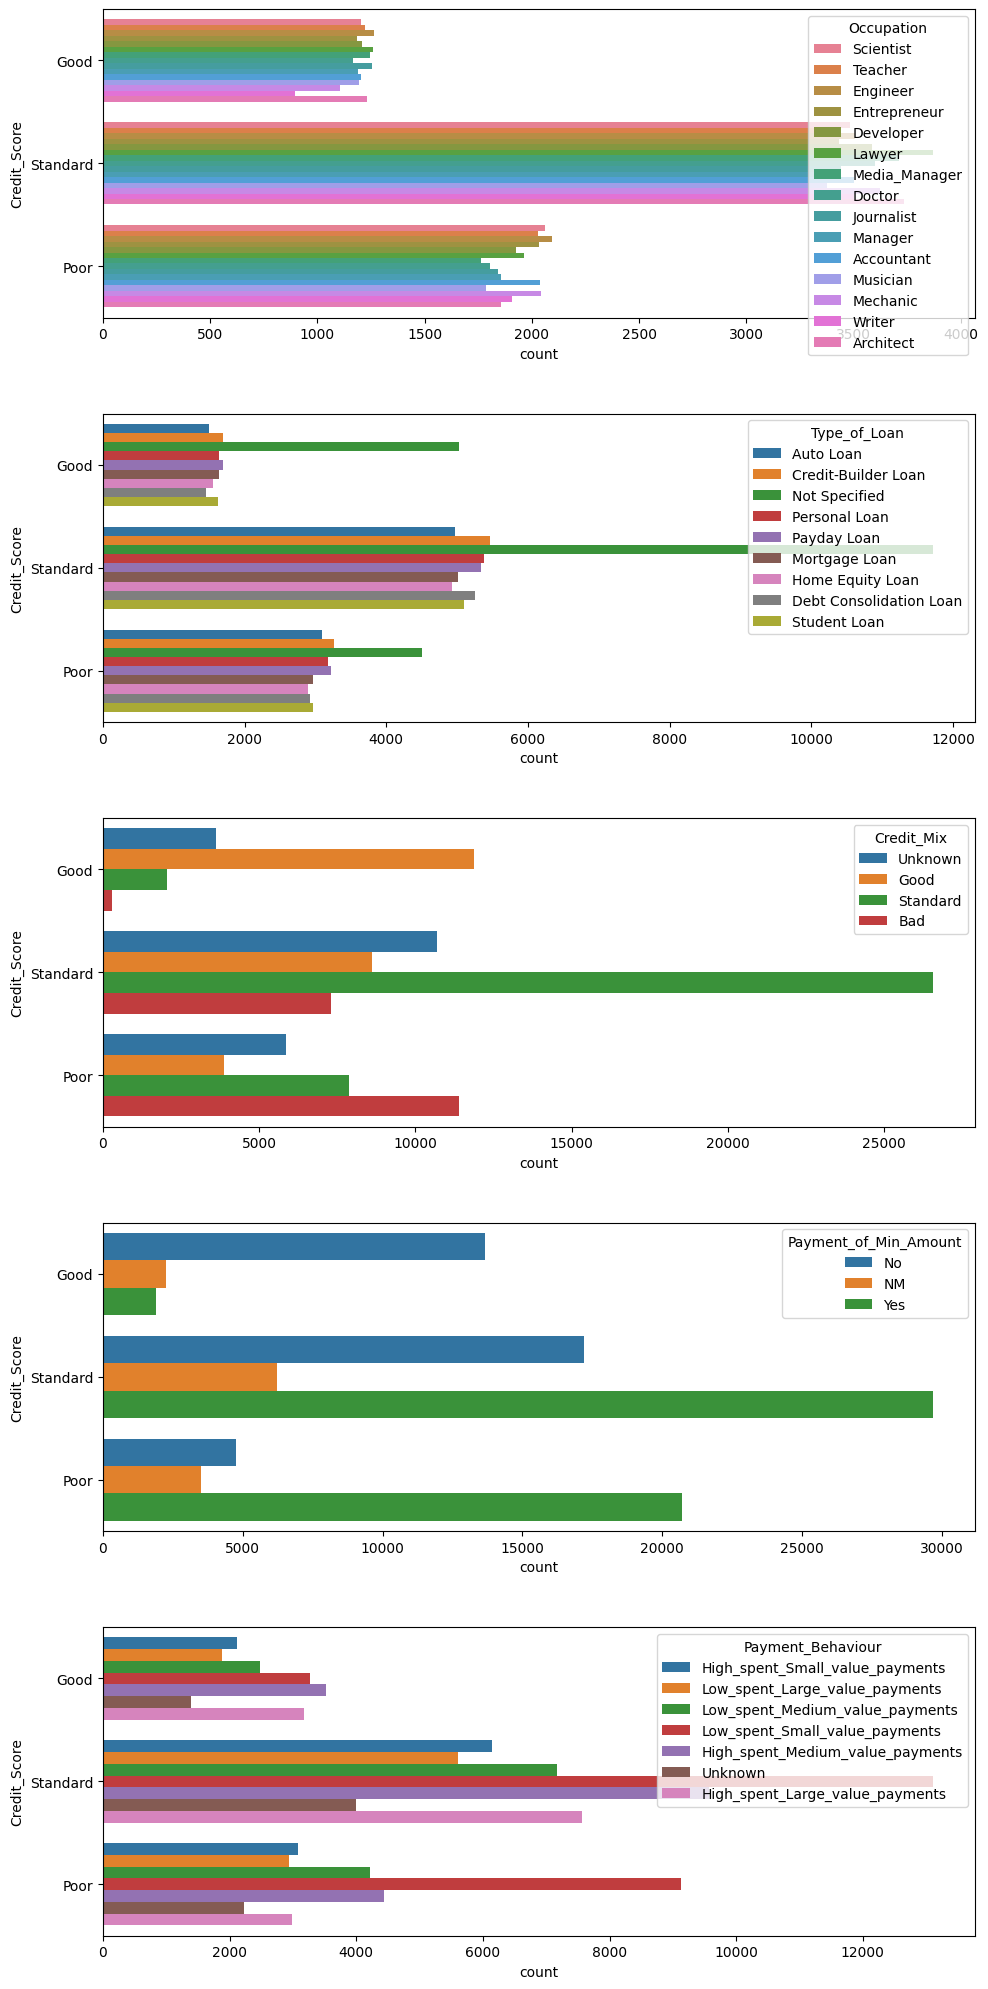

In [28]:
def categorical_plot(features, df, segment_feature=None):
    fig, ax = plt.subplots(len(features), 1,figsize=(10,20))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, y=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=feature, ax=ax[i])
    plt.tight_layout()
    plt.show()

categorical_plot(
    features=[
        'Occupation',
        'Type_of_Loan',
        'Credit_Mix',
        'Payment_of_Min_Amount',
        'Payment_Behaviour'
    ],
    df=cleaned_df,
    segment_feature="Credit_Score"
)

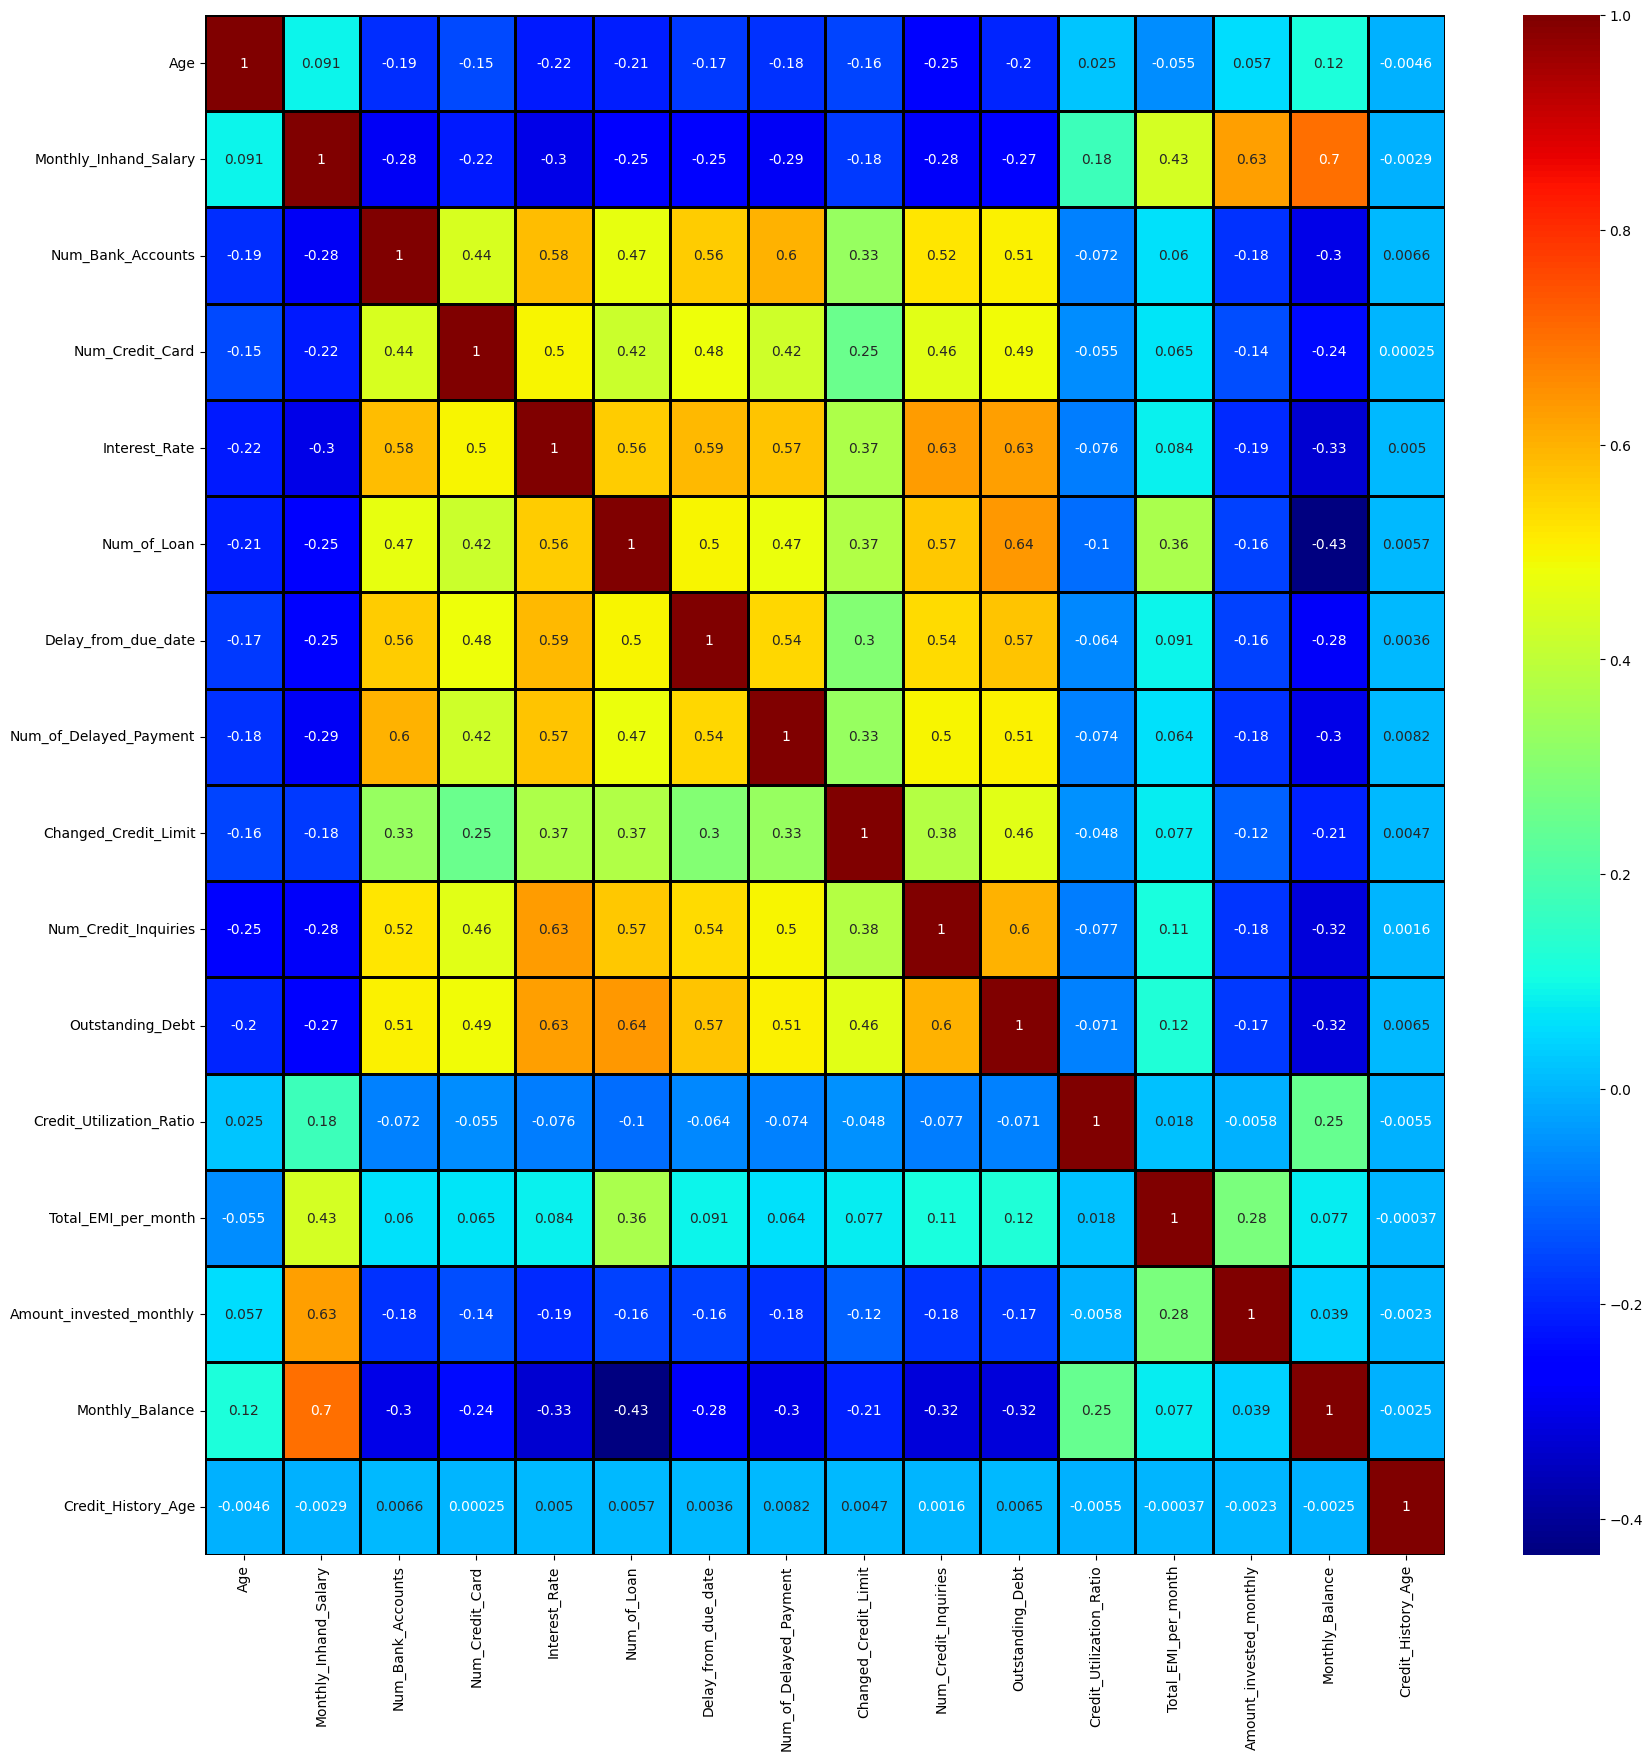

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df[numerical_columns].corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

## Data Preprocessing

In [30]:
new_cleaned_df = cleaned_df.drop(columns=['Customer_ID', 'Month', 'Occupation', 'Type_of_Loan', 'Credit_Utilization_Ratio'], axis=1)
new_cleaned_df.head()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Unknown,809.98,1.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,1824.843333,3.0,4.0,3.0,4.0,0.0,6.0,11.27,4.0,Good,809.98,1.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,3.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,4.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,1824.843333,3.0,4.0,3.0,4.0,6.0,6.0,11.27,4.0,Good,809.98,5.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [31]:
train_df, test_df = train_test_split(new_cleaned_df, test_size=0.05, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(train_df.shape)
print(test_df.shape)

(95000, 19)
(5000, 19)


In [32]:
new_cleaned_df.isna().sum()

,0
Age,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0
Num_Credit_Card,0
Interest_Rate,0
Num_of_Loan,0
Delay_from_due_date,0
Num_of_Delayed_Payment,0
Changed_Credit_Limit,0
Num_Credit_Inquiries,0


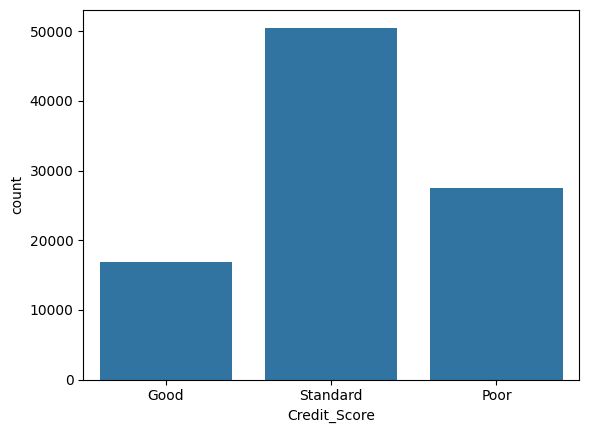

In [33]:
sns.countplot(data=train_df, x="Credit_Score")
plt.show()

In [34]:
train_df.Credit_Score.value_counts()

,count
Credit_Score,
Standard,50525
Poor,27539
Good,16936


In [35]:
df_majority_1 = train_df[(train_df.Credit_Score == "Standard")]
df_majority_2 = train_df[(train_df.Credit_Score == "Poor")]
df_minority = train_df[(train_df.Credit_Score == "Good")]

In [36]:
df_majority_1_undersampled = resample(df_majority_1, n_samples=16936, random_state=42)
df_majority_2_undersampled = resample(df_majority_2, n_samples=16936, random_state=42)
print(df_majority_1_undersampled.shape)
print(df_majority_2_undersampled.shape)

(16936, 19)
(16936, 19)


In [37]:
undersampled_train_df = pd.concat([df_minority, df_majority_1_undersampled]).reset_index(drop=True)
undersampled_train_df = pd.concat([undersampled_train_df, df_majority_2_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
11026,20.0,3057.441667,6.0,6.0,32.0,8.0,19.0,17.0,5.72,11.0,Unknown,2608.97,11.0,Yes,141.885133,129.240819,Low_spent_Small_value_payments,324.618215,Standard
5644,40.0,5855.693333,5.0,6.0,9.0,1.0,0.0,8.0,7.78,3.0,Good,339.20,4.0,No,43.569615,186.339386,High_spent_Medium_value_payments,605.660332,Poor
47910,30.0,722.207083,6.0,4.0,8.0,4.0,24.0,10.0,9.31,1.0,Standard,1335.49,8.0,Yes,20.083724,22.953600,High_spent_Medium_value_payments,279.183384,Standard
41881,52.0,9260.522500,1.0,4.0,11.0,0.0,15.0,4.0,6.64,2.0,Good,544.82,9.0,NM,0.000000,152.301984,High_spent_Large_value_payments,1013.750266,Good
26939,18.0,14238.573333,2.0,6.0,11.0,3.0,11.0,10.0,11.60,4.0,Unknown,59.21,5.0,No,391.629370,968.501097,High_spent_Small_value_payments,323.726867,Standard


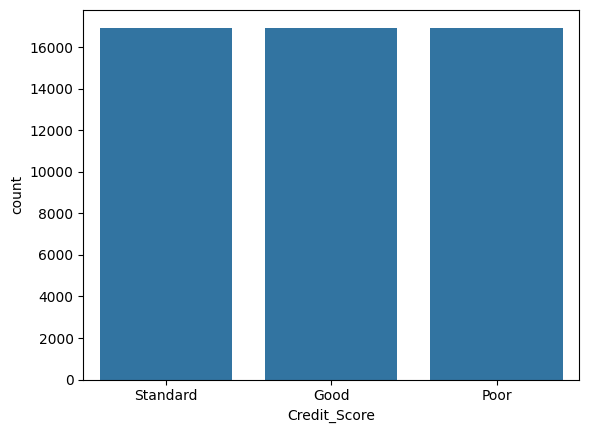

In [38]:
sns.countplot(data=undersampled_train_df, x="Credit_Score")
plt.show()

In [39]:
X_train = undersampled_train_df.drop(columns="Credit_Score", axis=1)
y_train = undersampled_train_df["Credit_Score"]

X_test = test_df.drop(columns="Credit_Score", axis=1)
y_test = test_df["Credit_Score"]

In [40]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))

            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df

In [41]:
numerical_columns = [
    'Age',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Credit_History_Age'
]

categorical_columns = [
    'Credit_Mix',
    'Payment_of_Min_Amount',
    'Payment_Behaviour'
]

new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

In [42]:
new_train_df.head()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0.690476,0.237662,0.454545,0.636364,0.242424,0.666667,0.194030,0.392857,0.387503,0.529412,2,0.483121,0.909091,2,0.113024,0.025093,0,0.266400
1,0.190476,0.503576,0.363636,0.454545,0.030303,0.444444,0.179104,0.392857,0.171828,0.235294,1,0.289799,0.727273,1,0.111900,0.080054,0,0.451454
2,0.428571,0.090128,0.272727,0.636364,0.121212,0.444444,0.208955,0.285714,0.274322,0.117647,1,0.168241,1.000000,1,0.033189,0.021363,3,0.221049
3,0.476190,0.126136,0.454545,0.636364,0.272727,0.444444,0.194030,0.642857,0.057002,0.117647,1,0.063219,0.636364,0,0.060780,0.020599,0,0.212522
4,0.452381,0.104396,0.363636,0.454545,0.303030,0.444444,0.268657,0.000000,0.036722,0.058824,1,0.025547,0.272727,1,0.050268,0.082627,5,0.155497


In [43]:
new_test_df.head()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0.380952,0.227190,0.090909,0.454545,0.272727,0.000000,0.134328,0.214286,0.293779,0.000000,1,0.293737,0.727273,1,0.000000,0.027518,0,0.354085
1,0.095238,0.065183,0.727273,0.636364,0.515152,0.666667,0.268657,0.607143,0.600438,0.529412,0,0.953740,0.181818,2,0.043767,0.060208,5,0.152059
2,0.642857,0.709222,0.454545,0.181818,0.303030,0.222222,0.044776,0.000000,0.104686,0.176471,1,0.239067,1.000000,1,0.146336,0.640367,5,0.523208
3,0.500000,0.089119,0.545455,0.545455,0.939394,0.222222,0.223881,0.464286,0.285010,0.647059,2,0.509094,0.363636,2,0.019417,0.034071,5,0.229215
4,0.309524,0.482085,0.090909,0.181818,0.333333,0.444444,0.014925,0.000000,0.266922,0.235294,1,0.161826,0.818182,1,0.133093,0.058902,1,0.444993


In [44]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")

new_y_test = encoder.transform(y_test)

In [45]:
print(new_y_train)
print(new_y_test)

[2 0 0 ... 1 0 0]
[0 1 0 ... 2 1 0]


In [46]:
pca_numerical_columns_1 = [
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_History_Age'
]

pca_numerical_columns_2 = [
    'Monthly_Inhand_Salary',
    'Monthly_Balance',
    'Amount_invested_monthly',
    'Total_EMI_per_month'
]

In [47]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

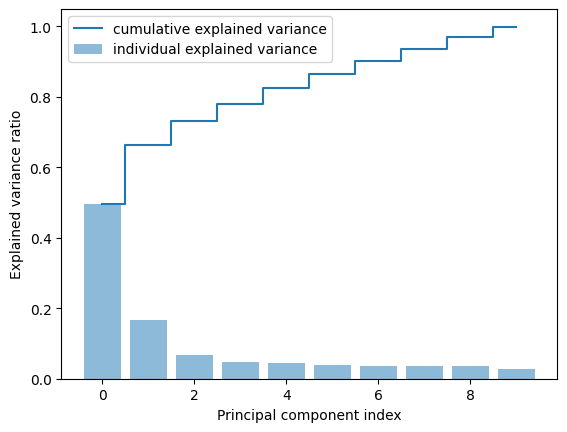

In [48]:
pca = PCA(n_components=len(pca_numerical_columns_1), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_1])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_1])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_1)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_1)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [49]:
pca_1 = PCA(n_components=5, random_state=123)
pca_1.fit(train_pca_df[pca_numerical_columns_1])
joblib.dump(pca_1, "model/pca_{}.joblib".format(1))
princ_comp_1 = pca_1.transform(train_pca_df[pca_numerical_columns_1])
train_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
train_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
train_pca_df.head()

,Age,Monthly_Inhand_Salary,Credit_Mix,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5
0,0.690476,0.237662,2,2,0.113024,0.025093,0,0.266400,0.183477,0.403959,0.333118,0.039088,0.053214
1,0.190476,0.503576,1,1,0.111900,0.080054,0,0.451454,-0.278144,0.224960,0.150272,0.207708,-0.013401
2,0.428571,0.090128,1,1,0.033189,0.021363,3,0.221049,-0.315832,0.496307,0.170522,0.094490,-0.075925
3,0.476190,0.126136,1,0,0.060780,0.020599,0,0.212522,-0.145601,0.131880,-0.124366,0.289225,-0.161915
4,0.452381,0.104396,1,1,0.050268,0.082627,5,0.155497,-0.435174,-0.231615,0.146365,0.060630,-0.293102


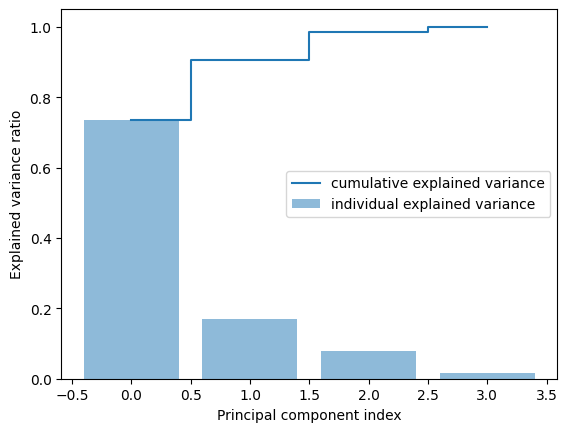

In [50]:
pca = PCA(n_components=len(pca_numerical_columns_2), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_2])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_2])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_2)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_2)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [51]:
pca_2 = PCA(n_components=2, random_state=123)
pca_2.fit(train_pca_df[pca_numerical_columns_2])
joblib.dump(pca_2, "model/pca_{}.joblib".format(2))
princ_comp_2 = pca_2.transform(train_pca_df[pca_numerical_columns_2])
train_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(princ_comp_2, columns=["pc2_1", "pc2_2"])
train_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
train_pca_df.head()

,Age,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2
0,0.690476,2,2,0,0.183477,0.403959,0.333118,0.039088,0.053214,-0.041153,0.042993
1,0.190476,1,1,0,-0.278144,0.224960,0.150272,0.207708,-0.013401,0.278922,0.109200
2,0.428571,1,1,3,-0.315832,0.496307,0.170522,0.094490,-0.075925,-0.200170,0.056832
3,0.476190,1,0,0,-0.145601,0.131880,-0.124366,0.289225,-0.161915,-0.168846,0.037691
4,0.452381,1,1,5,-0.435174,-0.231615,0.146365,0.060630,-0.293102,-0.198205,-0.034669


## Modeling

### Decision Tree

In [52]:
tree_model = DecisionTreeClassifier(random_state=123)

param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [53]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}


In [54]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='entropy',
    max_depth=6,
    max_features='sqrt'
)

tree_model.fit(train_pca_df, new_y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

### Random Forest

In [55]:
rdf_model = RandomForestClassifier(random_state=123)

param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_rdf = RandomizedSearchCV(estimator=rdf_model, param_distributions=param_grid, cv=5, n_jobs=-1)
CV_rdf.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [6, 7, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 500]})

In [56]:
print("best parameters: ", CV_rdf.best_params_)

best parameters:  {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'gini'}


In [57]:
rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=500,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1
)
rdf_model.fit(train_pca_df, new_y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")

['model/rdf_model.joblib']

### Gradient Boosting

In [58]:
gboost_model = GradientBoostingClassifier(random_state=123)

param_dist = {
    'max_depth': [5, 8],
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.1],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_gboost = RandomizedSearchCV(estimator=gboost_model, param_distributions=param_dist, cv=5, n_jobs=-1)
CV_gboost.fit(train_pca_df, new_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=123),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1],
                                        'max_depth': [5, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 300]})

In [59]:
gboost_model = GradientBoostingClassifier(
    random_state=123,
    learning_rate=0.1,
    max_depth=8,
    max_features='sqrt',
    n_estimators=300
)
gboost_model.fit(train_pca_df, new_y_train)
joblib.dump(gboost_model, "model/gboost_model.joblib")

['model/gboost_model.joblib']